In [30]:
import numpy as np
import pandas as pd  
import seaborn as sns

import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [31]:
MHousing = pd.read_csv('BostonHousing.csv')
MHousing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
MHousing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.620261,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.608738,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
MHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     505 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [36]:
MHousing.isnull().sum()

crim       1
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [37]:
median_crim = MHousing.crim.median()
print(median_crim)

0.25915


In [58]:
MHousing['crim'] = MHousing['crim'].fillna(median_crim)
print(MHousing['crim'])

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64


<AxesSubplot:>

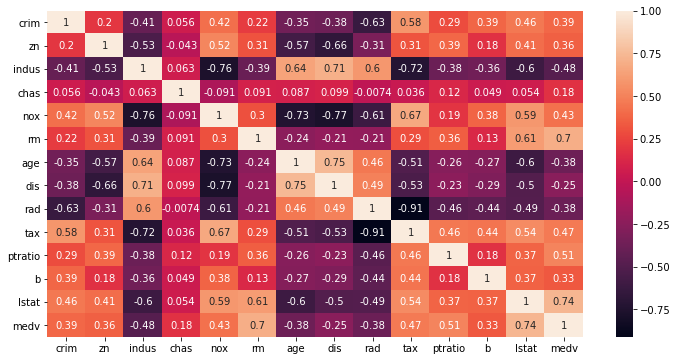

In [82]:
plt.figure(figsize=(12,6))
corr_val=MHousing.corr()
sns.heatmap(data=corr_val,annot=True)

In [83]:
#Etracting all features which is highly correlated with target 
def HighlyCorrelated(data,threshold):
    feature=[]
    values=[]
    for ele,index in enumerate(data.index):
        if abs(data[index])> threshold:
            feature.append(index)
            values.append(data[index])
    df=pd.DataFrame(data=values,index=feature,columns= ["Correlation"])
    return df
threshold=0.5
corr_df=HighlyCorrelated(corr_val.medv,threshold)
corr_df

,Correlation
rm,0.695360
ptratio,0.507787
lstat,0.737663
medv,1.000000


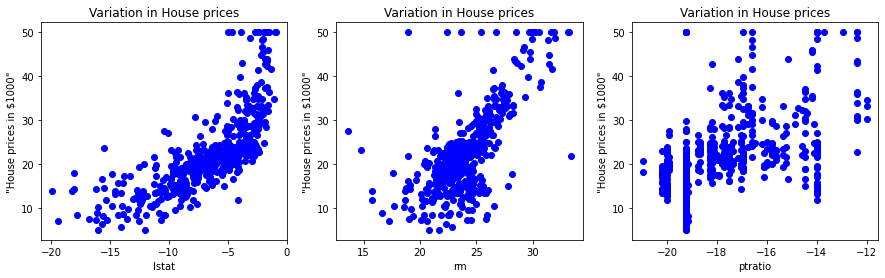

In [84]:

plt.figure(figsize=(15, 4))

features = ['lstat', 'rm','ptratio']
target = MHousing['medv']

for i, col in enumerate(features):
   plt.subplot(1, len(features) , i+1)
   x = MHousing[col]
   y = target
   plt.scatter(x, y,color='blue', marker='o')
   plt.title("Variation in House prices")
   plt.xlabel(col)
   plt.ylabel('"House prices in $1000"')

In [59]:
reg = LinearRegression()
reg.fit(MHousing[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']],MHousing.medv)


LinearRegression()

In [60]:
m_coef = reg.coef_
print(m_coef)

[-1.08000990e-01  4.64193454e-02  2.05590227e-02  2.68673895e+00
 -1.77667072e+01  3.80987852e+00  6.93297293e-04 -1.47553787e+00
  3.06045168e-01 -1.23346104e-02 -9.52761853e-01  9.31187228e-03
 -5.24753570e-01]


In [61]:
intercept = reg.intercept_
print(intercept)

36.45944457888182


In [80]:
price = m_coef[0] * MHousing['crim'] + m_coef[1] *  MHousing['zn'] + m_coef[2] *  MHousing['indus'] + m_coef[3] *  MHousing['chas'] + m_coef[4] *  MHousing['nox']+ m_coef[5] *  MHousing['rm']+ m_coef[6] *  MHousing['age']+ m_coef[7] *  MHousing['dis']+ m_coef[8] *  MHousing['rad']+ m_coef[9] *  MHousing['tax']+ m_coef[10] *  MHousing['ptratio']+ m_coef[11] *  MHousing['b']+ m_coef[12] *  MHousing['lstat'] + intercept
print(price)

0      326.097338
1      307.455215
2      317.137325
3      313.940630
4      316.762145
          ...    
501    340.325894
502    332.881912
503    344.098564
504    342.170414
505    331.718678
Length: 506, dtype: float64
